# Proyek Analisis Data: E-commerece Public Dataset
- **Nama:** Sharon Tabita Sulung
- **Email:** m309d4kx1726@bangkit.academy
- **ID Dicoding:** M309D4KX1726

## Business Questions

1. Does the cost of shipping goods affect the amount of sales in 2018?
2. Which products are the top 10 best sellers in sales ?

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import streamlit as st

## Data Wrangling

1. Gathering Data

In [22]:
# reading dataset
product_df = pd.read_csv ('data/products_dataset.csv')
order_df = pd.read_csv ('data/order_items_dataset.csv')
customer_df = pd.read_csv ('data/customers_dataset.csv')
orderdata_df = pd.read_csv ('data/orders_dataset.csv')

In [24]:
# Merge product_df dan order_df berdasarkan product_id
merged_df = pd.merge(customer_df, orderdata_df, on='customer_id', how='inner')

# Merge dengan customer_df berdasarkan customer_id
merged_df = pd.merge(merged_df, order_df, on='order_id', how='inner')

# Merge dengan orderdata_df berdasarkan order_id
merged_df = pd.merge(merged_df, product_df, on='product_id', how='inner')


In [25]:
# Simpan hasil penggabungan ke dalam file CSV
merged_df.to_csv('df_merged.csv', index=False)

In [27]:
# displays the top 5 datasets
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [28]:
# displays the top 5 datasets
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


2. Assessing Data

In [29]:
# Checking if there is any duplication in the data
merged_df.duplicated().sum()

0

from the results above there is no duplicate data found

In [30]:
# Check if there are missing values in the data
merged_df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

3. Cleaning Data

In [31]:
# delete missing value
merged_df.dropna(axis=0, inplace=True)

In [32]:
datetime_columns = ['shipping_limit_date']
 
for column in datetime_columns:
  merged_df[column] = pd.to_datetime(merged_df[column])

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108643 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108643 non-null  object        
 1   customer_unique_id             108643 non-null  object        
 2   customer_zip_code_prefix       108643 non-null  int64         
 3   customer_city                  108643 non-null  object        
 4   customer_state                 108643 non-null  object        
 5   order_id                       108643 non-null  object        
 6   order_status                   108643 non-null  object        
 7   order_purchase_timestamp       108643 non-null  object        
 8   order_approved_at              108643 non-null  object        
 9   order_delivered_carrier_date   108643 non-null  object        
 10  order_delivered_customer_date  108643 non-null  object        
 11  

## Exploratory Data Analysis (EDA)

- Will be displayed from 2016 - 2020 the most sales of goods in each month

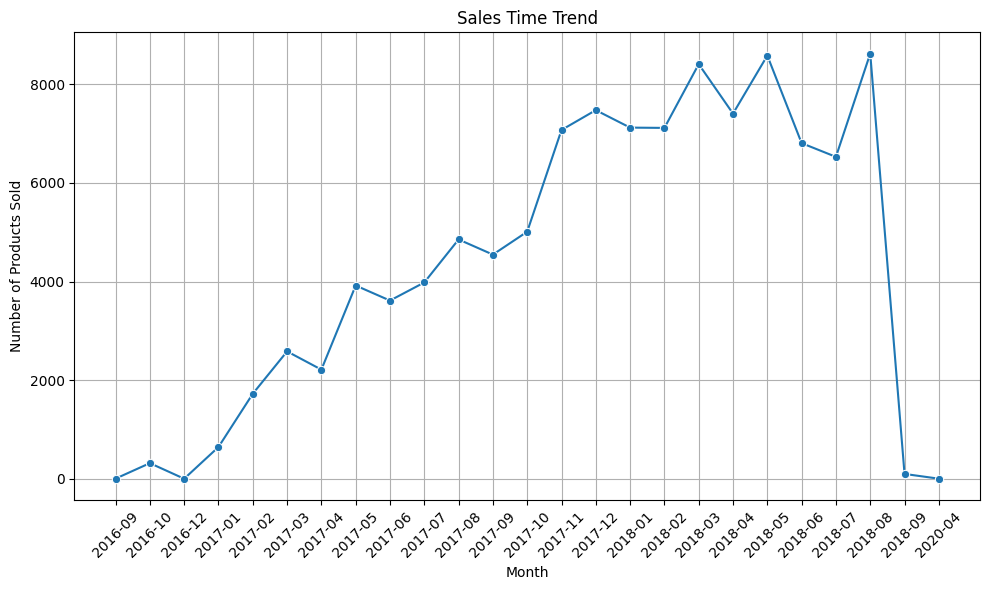

In [39]:
# Create a new column to extract the year and month from the delivery date
merged_df['year_month'] = merged_df['shipping_limit_date'].dt.to_period('M')

# Calculate the number of products sold per month
monthly_sales = merged_df.groupby('year_month').size()


# Sales time trend plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.title('Sales Time Trend')
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

From the visualization results can be seen in March, April, and August in 2018 is the time with the highest sales while the drastic decline in sales occurred from the end of August to September.

- Next, we will visualize the 5 best-selling products in 2017 - 2018.

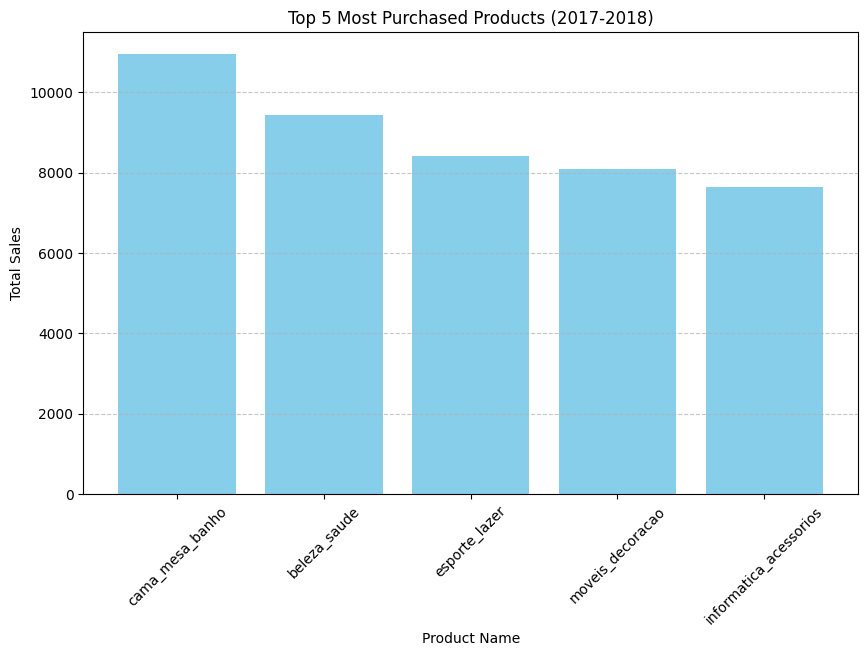

In [38]:
# Filter data for 2017-2018 only
df_terakhir = merged_df[(merged_df['shipping_limit_date'].dt.year >= 2017) & (merged_df['shipping_limit_date'].dt.year <= 2018)]

# Calculate the total sales of each item
penjualan_barang = df_terakhir['product_category_name'].value_counts().reset_index()
penjualan_barang.columns = ['product_category_name', 'total_penjualan']

# Take the 5 most frequently purchased items
top_5_barang = penjualan_barang.head()

# Visualize your 5 most frequently purchased items
plt.figure(figsize=(10, 6))
plt.bar(top_5_barang['product_category_name'], top_5_barang['total_penjualan'], color='skyblue')
plt.title('Top 5 Most Purchased Products (2017-2018)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the visualization results above there are best 5 products sold in 2017 - 2018:
1. cama_mesa_banho
2. beleza_saude
3. esporte_lazer
4. moveis_decoracao
5. informatica_acessorios

- Analyzed the distribution of customers based on the 5 cities they live in 

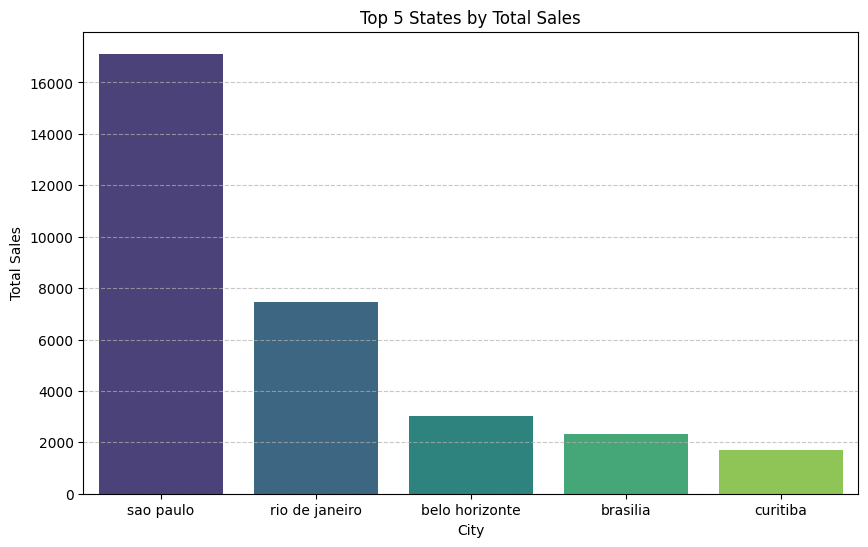

In [54]:
# Menghitung jumlah pembelian per negara bagian
customer_city_sales = merged_df['customer_city'].value_counts().reset_index()
customer_city_sales.columns = ['customer_city', 'total_sales']

# Mengambil lima negara bagian dengan pembelian terbanyak
top_5_states = customer_city_sales.head()

# Visualisasi distribusi pembelian per negara bagian
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_states, x='customer_city', y='total_sales', palette='viridis')
plt.title('Top 5 States by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1. sau paulo
2. rio de janeiro
3. belo horizonte
4. brasilia
5. curbitia

# Visualization & Explanatory Analysis

1. Does the cost of shipping goods affect the amount of sales in 2018?

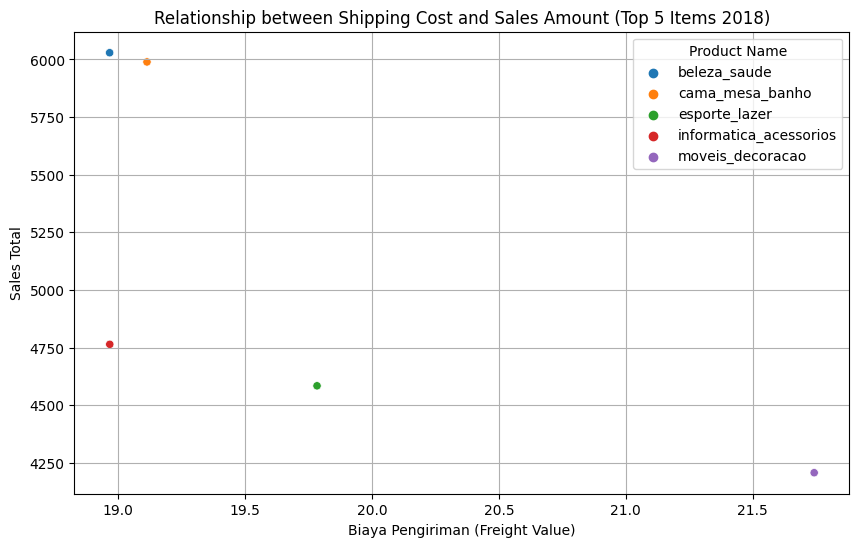

In [14]:
# Filter data for 2018 only
df_2018 = merged_df[merged_df['shipping_limit_date'].dt.year == 2018]

# Calculate total sales for each item
top_5_barang = df_2018['product_category_name'].value_counts().head().index.tolist()
df_top_5 = df_2018[df_2018['product_category_name'].isin(top_5_barang)]
penjualan_per_barang = df_top_5.groupby('product_category_name')['order_item_id'].count().reset_index()
penjualan_per_barang.columns = ['product_category_name', 'total_penjualan']

# Calculate the average shipping cost for each item
biaya_pengiriman_per_barang = df_top_5.groupby('product_category_name')['freight_value'].mean().reset_index()

# Merge both data
data_combined = pd.merge(penjualan_per_barang, biaya_pengiriman_per_barang, on='product_category_name')

# Visualize the relationship between shipping cost and sales amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_combined, x='freight_value', y='total_penjualan', hue='product_category_name')
plt.title('Relationship between Shipping Cost and Sales Amount (Top 5 Items 2018)')
plt.xlabel('Biaya Pengiriman (Freight Value)')
plt.ylabel('Sales Total')
plt.grid(True)
plt.legend(title='Product Name')
plt.show()

Top 5 best-selling products in 2018:
1. beleza_saude
2. cama_meza_banho
3. esporte_lazer
4. informatica_accessorios
5. movies_decoracao

2. Which products are the top 10 best sellers in sales ?

Text(0.5, 0, 'Number of Orders')

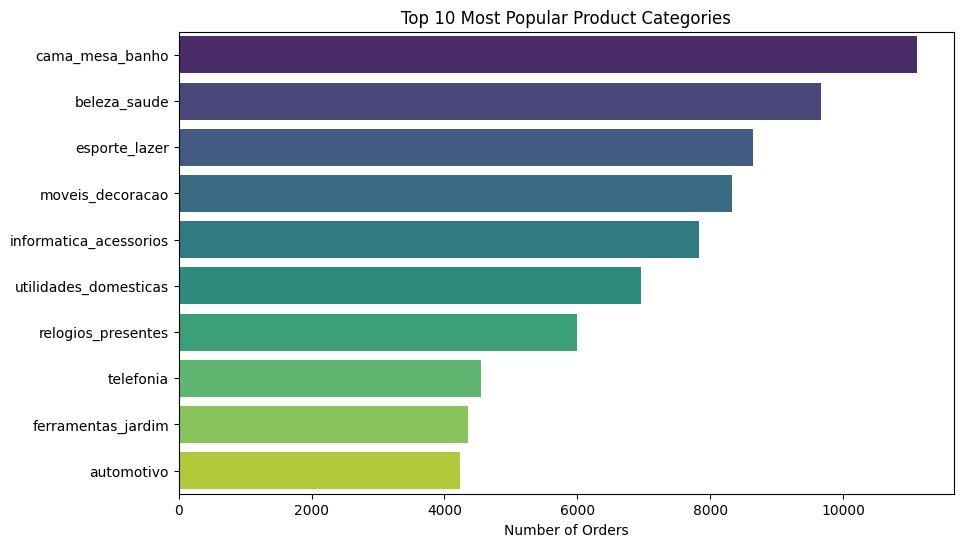

In [15]:
#Calculate the frequency of each product category
category_counts = merged_df['product_category_name'].value_counts().head(10) 

# Visualize product category frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Product Categories')
plt.xlabel('Number of Orders')

In [40]:
# Caculate Recency
recency = merged_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
recency['recency'] = (pd.to_datetime('today') - recency['order_purchase_timestamp']).dt.days

# Caculate Frequency
frequency = merged_df.groupby('customer_id')['order_id'].nunique().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Caculate Monetary
monetary = merged_df.groupby('customer_id')['price'].sum().reset_index()

# Marged data Recency, Frequency, dan Monetary
rfm = pd.merge(recency[['customer_id', 'recency']], frequency, on='customer_id')
rfm = pd.merge(rfm, monetary, on='customer_id')

# Tampilkan 5 baris pertama dari data RFM
print(rfm.head())


                        customer_id  recency  frequency   price
0  00012a2ce6f8dcda20d059ce98491703     2300          1   89.80
1  000161a058600d5901f007fab4c27140     2421          1   54.90
2  0001fd6190edaaf884bcaf3d49edf079     2559          1  179.99
3  0002414f95344307404f0ace7a26f1d5     2390          1  149.90
4  000379cdec625522490c315e70c7a9fb     2161          1   93.00


From the data, we can conclude:

1. Customers with low recency (smaller values) tend to be customers who are more active or have recently made a purchase.
2. Customers with a high frequency (larger value) are customers who make frequent purchases.
3. Customers with a high price (larger value) tend to make purchases with a larger transaction value.

# Conclusions

1. Does the cost of shipping goods affect the amount of sales in 2018?

    From the visualization results it can be seen that the lower the shipping costs, the higher the goods sold, as for the items with the highest total sales with low shipping costs are beleza_saude

2. Which products are the top 10 best sellers in sales ?

    From the visualization results above, it can be concluded that mapping the 10 highest selling products is one solution to see consumer interest in products so that companies pay attention to producing products with the highest sales, besides that it is a consideration in the future to produce these goods.